# **Convolutional Neural Network**

In [1]:
# Selecting the required Keras and TensorFlow version
!pip install q keras==2.3.1
%tensorflow_version 1.5.1

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.5.1`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [2]:
# Importing relevant packages
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# Initializing the input image dimensions
img_rows, img_cols = 28, 28

In [4]:
# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Size of MNIST training set = %d." % len(X_train))
print("Size of MNIST test set = %d" % len(X_test))

Size of MNIST training set = 60000.
Size of MNIST test set = 10000


In [5]:
# Reshaping the imput image to the required dimensions
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
# Scaling each pixel to the range [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [7]:
# Encoding the labels into integers
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [8]:
input_shape

(28, 28, 1)

In [10]:
# Defining the Model Architecture
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [11]:
# Compiling the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Training the Model
history = model.fit(X_train, y_train, batch_size=128, epochs=12, validation_data=(X_test, y_test), verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.3977 - accuracy: 0.8760 - val_loss: 0.0748 - val_accuracy: 0.9759
Epoch 2/12
60000/60000 [==============================] - 2s 41us/step - loss: 0.1277 - accuracy: 0.9611 - val_loss: 0.0529 - val_accuracy: 0.9827
Epoch 3/12
60000/60000 [==============================] - 3s 42us/step - loss: 0.0996 - accuracy: 0.9696 - val_loss: 0.0408 - val_accuracy: 0.9858
Epoch 4/12
60000/60000 [==============================] - 2s 41us/step - loss: 0.0819 - accuracy: 0.9752 - val_loss: 0.0353 - val_accuracy: 0.9874
Epoch 5/12
60000/60000 [==============================] - 2s 42us/step - loss: 0.0705 - accuracy: 0.9787 - val_loss: 0.0307 - val_accuracy: 0.9889
Epoch 6/12
60000/60000 [==============================] - 2s 41us/step - loss: 0.0647 - accuracy: 0.9805 - val_loss: 0.0274 - val_accuracy: 0.9908
Epoch 7/12
60000/60000 [==============================] - 2s 41us/s

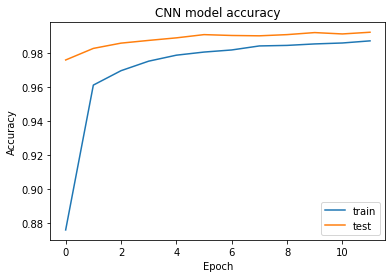

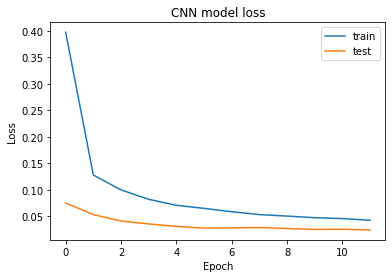

In [13]:
# summarizing the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarizing the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [14]:
# Computing the classification perfomance on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

Test loss: 0.023985021708986278
Test accuracy: 99.22000169754028


In [15]:
# Saving the trained model
model.save('cnn_model.h5')